## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyspark.sql.functions as F
from pyspark.sql import SparkSession

### Configs

In [2]:
# Create SparkSession
spark = SparkSession.builder.appName("DataVizHdp").getOrCreate()

# Set the LD_LIBRARY_PATH configuration
spark.conf.set("spark.executorEnv.LD_LIBRARY_PATH", "/home/hadoopuser/hadoop/lib")

# Show the spark dataframe with good design
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/17 08:39:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Tests

In [3]:
data = spark.read.csv("hdfs://localhost:9000/energy_data/opendata_energy.csv", header=True, inferSchema=True, sep=";")

In [4]:
data

23/07/17 08:39:41 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Opérateur,Année,Filière,Consommation Agriculture (MWh),Nombre de points Agriculture,Nombre de mailles secretisées (agriculture),Indique qualité Agriculture,Consommation Industrie (MWh),Nombre de points Industrie,Nombre de mailles secretisées (industrie),Indice qualité Industrie,Consommation Tertiaire (MWh),Nombre de points Tertiaire,Nombre de mailles secretisées (tertiaire),Indice qualité Tertiaire,Consommation Résidentiel (MWh),Nombre de points Résidentiel,Nombre de mailles secretisées (résidentiel),Indice qualité Résidentiel,Thermosensibilité (MWh/degré-jour),Part Thermosensible,Consommation Secteur Inconnu (MWh),Nombre de points Secteur Inconnu,Nombre de mailles secretisées (secteur inconnu),Indice qualité Non Affecté,Code Commune,Libellé Commune,Code EPCI,Libellé EPCI,Code Département,Libellé Département,Code Région,Libellé Région,id_filiere,Consommation totale (MWh),Code_postal
Enedis,2015,Electricité,88.62,1,0,0.896,119.15,3,0,0.95,271.1,5,0,0.902,2433.88,416,0,0.434,0.0,0.0,0.0,0,0,0.0,15117,Marcolès,200066678,CC de la Châtaign...,15,Cantal,84,Auvergne-Rhône-Alpes,100,2912.75,15220
Enedis,2015,Electricité,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,427.31,132,0,0.379,0.0,0.0,0.0,0,0,0.0,15126,Molèdes,200066637,CC Hautes Terres ...,15,Cantal,84,Auvergne-Rhône-Alpes,100,427.31,15500
Enedis,2015,Electricité,0.0,0,0,0.0,1.98,1,0,0.832,0.0,0,0,0.0,730.6,187,0,0.409,0.0,0.0,0.0,0,0,0.0,15129,Montboudif,241500255,CC du Pays Gentiane,15,Cantal,84,Auvergne-Rhône-Alpes,100,732.58,15190
Enedis,2015,Electricité,0.0,0,0,0.0,1409.68,1,0,1.0,74.15,2,0,0.977,430.9,90,0,0.479,0.0,0.0,0.0,0,0,0.0,15133,Montmurat,200066678,CC de la Châtaign...,15,Cantal,84,Auvergne-Rhône-Alpes,100,1914.73,15600
Enedis,2015,Electricité,0.0,0,0,0.0,6897.35,12,0,0.995,2849.61,19,0,0.977,7689.73,1535,0,0.509,0.0,0.0,0.0,0,0,0.0,15138,Murat,200066637,CC Hautes Terres ...,15,Cantal,84,Auvergne-Rhône-Alpes,100,17436.690000000002,15300/15300
Enedis,2015,Electricité,0.0,0,0,0.0,0.56,1,0,1.0,0.0,0,0,0.0,730.03,187,0,0.471,0.0,0.0,0.0,0,0,0.0,15151,Peyrusse,200066637,CC Hautes Terres ...,15,Cantal,84,Auvergne-Rhône-Alpes,100,730.5899999999999,15170
Enedis,2015,Electricité,0.0,0,0,0.0,230.11,2,0,0.983,3453.95,11,0,0.979,7119.82,1531,0,0.436,0.0,0.0,0.0,0,0,0.0,15153,Pleaux,241501139,CC du Pays de Salers,15,Cantal,84,Auvergne-Rhône-Alpes,100,10803.88,15700/15700/15700...
Enedis,2015,Electricité,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,323.05,97,0,0.425,0.0,0.0,0.0,0,0,0.0,15155,Pradiers,200066637,CC Hautes Terres ...,15,Cantal,84,Auvergne-Rhône-Alpes,100,323.05,15160
Enedis,2015,Electricité,0.0,0,0,0.0,14582.3,12,0,0.998,3385.18,24,0,0.925,10383.92,1991,0,0.37,0.0,0.0,0.18,1,0,1.0,15162,Riom-ès-Montagnes,241500255,CC du Pays Gentiane,15,Cantal,84,Auvergne-Rhône-Alpes,100,28351.58,15400
Enedis,2015,Electricité,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,578.24,152,0,0.439,0.0,0.0,0.0,0,0,0.0,15173,Saint-Bonnet-de-C...,241500255,CC du Pays Gentiane,15,Cantal,84,Auvergne-Rhône-Alpes,100,578.24,15190


In [5]:
aggregated_data = data.groupBy("Année").agg(
    F.sum("Consommation Agriculture (MWh)").alias("Total Agriculture Consumption"),
    F.sum("Consommation Industrie (MWh)").alias("Total Industrial Consumption"),
    F.sum("Consommation Tertiaire  (MWh)").alias("Total Tertiary Consumption"),
    F.sum("Consommation Résidentiel  (MWh)").alias("Total Residential Consumption")
)

In [6]:
aggregated_data

Année,Total Agriculture Consumption,Total Industrial Consumption,Total Tertiary Consumption,Total Residential Consumption
2018,9847756.557391748,3.5596801222389096E8,2.2962448911944997E8,3.000161935063108E8
2015,5934180.109999995,3.29026945476E8,1.6487241958000022E8,3.6864347327999973E8
2013,6073610.149999997,3.31550353064E8,1.74259773321E8,4.062655065820009E8
2014,5421901.320000003,3.1094783336999965E8,1.575759855400004E8,3.5291148682000035E8
2019,9889958.753086884,3.6654405202589434E8,2.25595300658168E8,2.973518493052854E8
2020,1.005457737880462E7,3.4815883942672724E8,2.1082070795008042E8,2.8659895099353313E8
2012,5921097.690000006,3.350577648770007E8,1.6825353930000007E8,3.880892683110005E8
2016,6154929.699999998,3.5633039270999956E8,1.673409573279999E8,3.879361969899992E8
2011,5738157.8199999975,2.9453643146799946E8,1.4675594914100087E8,3.548323074879992E8
2017,6309399.740000008,3.641538847900001E8,1.7098794561000028E8,3.819194805400005E8


In [7]:
pandas_df = aggregated_data.toPandas()

In [8]:
pandas_df.round(2)

,Année,Total Agriculture Consumption,Total Industrial Consumption,Total Tertiary Consumption,Total Residential Consumption
0,2018,9847756.56,3.559680e+08,2.296245e+08,3.000162e+08
1,2015,5934180.11,3.290269e+08,1.648724e+08,3.686435e+08
2,2013,6073610.15,3.315504e+08,1.742598e+08,4.062655e+08
3,2014,5421901.32,3.109478e+08,1.575760e+08,3.529115e+08
4,2019,9889958.75,3.665441e+08,2.255953e+08,2.973518e+08
5,2020,10054577.38,3.481588e+08,2.108207e+08,2.865990e+08
6,2012,5921097.69,3.350578e+08,1.682535e+08,3.880893e+08
7,2016,6154929.70,3.563304e+08,1.673410e+08,3.879362e+08
8,2011,5738157.82,2.945364e+08,1.467559e+08,3.548323e+08
9,2017,6309399.74,3.641539e+08,1.709879e+08,3.819195e+08


## Total Energy consumption bu sector

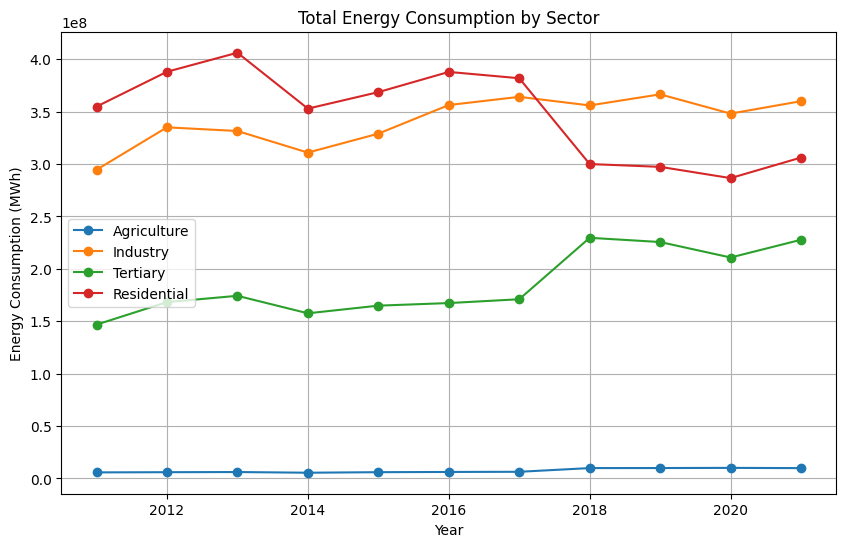

In [9]:
# Sort the DataFrame by the "Année" column
sorted_df = pandas_df.sort_values("Année")

# Plot the data using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(sorted_df["Année"], sorted_df["Total Agriculture Consumption"], label="Agriculture", linestyle="-", marker="o")
plt.plot(sorted_df["Année"], sorted_df["Total Industrial Consumption"], label="Industry", linestyle="-", marker="o")
plt.plot(sorted_df["Année"], sorted_df["Total Tertiary Consumption"], label="Tertiary", linestyle="-", marker="o")
plt.plot(sorted_df["Année"], sorted_df["Total Residential Consumption"], label="Residential", linestyle="-", marker="o")

# Add labels, title, legend, and grid
plt.xlabel("Year")
plt.ylabel("Energy Consumption (MWh)")
plt.title("Total Energy Consumption by Sector")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

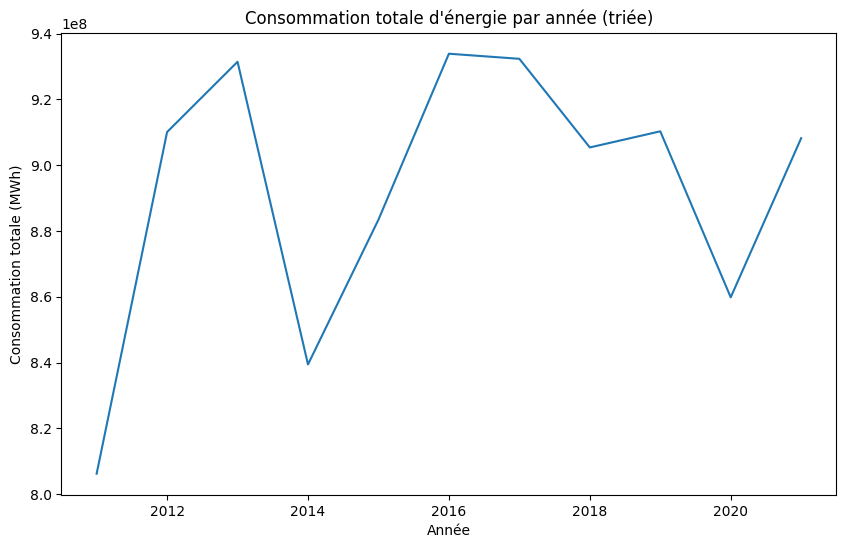

In [10]:
# Grouper les données par année et calculer la consommation totale par année
df_total_consumption = data.groupBy("Année").agg(F.sum("Consommation totale (MWh)").alias("Total Consumption"))

# Trier les données par année en ordre croissant
df_total_consumption = df_total_consumption.orderBy("Année")

# Convertir le DataFrame Spark en Pandas DataFrame pour la visualisation
pandas_df = df_total_consumption.toPandas()

# Plot the data using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(pandas_df["Année"], pandas_df["Total Consumption"])
plt.xlabel("Année")
plt.ylabel("Consommation totale (MWh)")
plt.title("Consommation totale d'énergie par année (triée)")
plt.show()

In [11]:
# Group by Operator and calculate total energy consumption
operator_consumption = data.groupby("Operator").agg({"Total Energy Consumption": "sum"})

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = operator_consumption.toPandas()

# Plot the bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(pandas_df["Operator"], pandas_df["sum(Total Energy Consumption)"])
plt.xlabel("Operator")
plt.ylabel("Total Energy Consumption (MWh)")
plt.title("Comparison of Total Energy Consumption by Operator")
plt.xticks(rotation=90)
plt.show()

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `Total Energy Consumption` cannot be resolved. Did you mean one of the following? [`Opérateur`, `Année`, `Filière`, `Consommation Agriculture (MWh)`, `Nombre de points Agriculture`, `Nombre de mailles secretisées (agriculture)`, `Indique qualité Agriculture`, `Consommation Industrie (MWh)`, `Nombre de points Industrie`, `Nombre de mailles secretisées (industrie)`, `Indice qualité Industrie`, `Consommation Tertiaire  (MWh)`, `Nombre de points Tertiaire`, `Nombre de mailles secretisées (tertiaire)`, `Indice qualité Tertiaire`, `Consommation Résidentiel  (MWh)`, `Nombre de points Résidentiel`, `Nombre de mailles secretisées (résidentiel)`, `Indice qualité Résidentiel`, `Thermosensibilité (MWh/degré-jour)`, `Part Thermosensible`, `Consommation Secteur Inconnu (MWh)`, `Nombre de points Secteur Inconnu`, `Nombre de mailles secretisées (secteur inconnu)`, `Indice qualité Non Affecté`, `Code Commune`, `Libellé Commune`, `Code EPCI`, `Libellé EPCI`, `Code Département`, `Libellé Département`, `Code Région`, `Libellé Région`, `id_filiere`, `Consommation totale (MWh)`, `Code_postal`].

In [12]:
# Group by Region and calculate total energy consumption
region_consumption = data.groupby("Region").agg({"Total Energy Consumption": "sum"})

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = region_consumption.toPandas()

# Plot the bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(pandas_df["Region"], pandas_df["sum(Total Energy Consumption)"])
plt.xlabel("Region")
plt.ylabel("Total Energy Consumption (MWh)")
plt.title("Total Energy Consumption by Region")
plt.xticks(rotation=90)
plt.show()

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `Total Energy Consumption` cannot be resolved. Did you mean one of the following? [`Opérateur`, `Année`, `Filière`, `Consommation Agriculture (MWh)`, `Nombre de points Agriculture`, `Nombre de mailles secretisées (agriculture)`, `Indique qualité Agriculture`, `Consommation Industrie (MWh)`, `Nombre de points Industrie`, `Nombre de mailles secretisées (industrie)`, `Indice qualité Industrie`, `Consommation Tertiaire  (MWh)`, `Nombre de points Tertiaire`, `Nombre de mailles secretisées (tertiaire)`, `Indice qualité Tertiaire`, `Consommation Résidentiel  (MWh)`, `Nombre de points Résidentiel`, `Nombre de mailles secretisées (résidentiel)`, `Indice qualité Résidentiel`, `Thermosensibilité (MWh/degré-jour)`, `Part Thermosensible`, `Consommation Secteur Inconnu (MWh)`, `Nombre de points Secteur Inconnu`, `Nombre de mailles secretisées (secteur inconnu)`, `Indice qualité Non Affecté`, `Code Commune`, `Libellé Commune`, `Code EPCI`, `Libellé EPCI`, `Code Département`, `Libellé Département`, `Code Région`, `Libellé Région`, `id_filiere`, `Consommation totale (MWh)`, `Code_postal`].

## 